In [5]:
%matplotlib inline
import random
import glob
import os
from PIL import Image
import torch
import torchvision
from torch.autograd import Variable
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
import utils.util as util
import utils.align as align
from models import networks
from options.test_options import TestOptions
import utils.visualize_test as visualize_test

opt = TestOptions().parse()
dataroot = './datasets/test_drop/'
phase = 'train'
B_path = glob.glob(os.path.join(dataroot,phase+'B/*'))
B_mask_path = glob.glob(os.path.join('./datasets/test_drop_masked_blur/trainB/*'))
A_path = glob.glob(os.path.join(dataroot,phase+'A/*'))
# AB_path = glob.glob(os.path.join(opt.dataroot,phase+'/*'))

img_show_128, img_pre_128 = visualize_test.get_trans(128, 128)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10000,10000)

------------ Options -------------
alpha_gate: 
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
dataroot: ./datasets/danbooru_celeba
dataset_mode: unaligned
debug: False
dense: False
downsample_7: False
equalize_input: 
f: /data2/minjunli/.local/share/jupyter/runtime/kernel-02f8484d-c036-4c6b-bb3f-d431e2a1504b.json
feat_len_D: 256
feat_only: False
fineSize: 128
gpu_ids: [0]
half_add: False
how_many: inf
idt: False
img_2ngf: False
img_only: False
init_type: xavier
input_nc: 3
isTrain: False
keep_pre: False
kw: 3
legacy_D: False
loadSize: 128
load_pre: False
lr_pre: 2e-05
max_dataset_size: inf
max_ngf: 256
model: cycle_gan
nThreads: 4
n_downsample: 2
n_layers_D: 3
n_layers_D_pre: 3
n_resblocks: 6
n_resblocks_next: 2
n_upsample: 2
name: experiment_name
ndf: 64
ngf: 128
no_dropout: False
no_flip: False
norm: batch
not_caffe: False
not_mono_gate: False
ntest: inf
one_out: False
out7: False
out_num: 3
output_nc: 3
phase: test
pix2pix_D: False
pre_path: 
resize_or_crop: resize_a

In [9]:
# female_model_list = glob.glob('/data2/minjunli/latest_model/inbox/*')
# female_model_list +=  glob.glob('/data2/minjunli/latest_model/outbox/Get*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_d4_aff_gp2p5_caffe_0/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_d3_aff_gp10_caffe_0/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_d4_aff_gp2p5_caffe_1/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_trued4_aff_gp10_caffe_1/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_d3_aff_gp2p5_caffe_3/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/Get_AisCelSelf_128_trued4_aff_gp10_caffe_3/bk_*')
# female_model_list += glob.glob('/data2/minjunli/latest_model/outbox/load*')
# female_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/Get_Ais*')
# female_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/Get_Ce*')
female_model_list = glob.glob('/data2/minjunli/prj/img-trans-pytorch/checkpoints/*female*')


In [10]:
sorted(female_model_list)

['/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_d4_gp10_ls256_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_d4_gp10_sc0.25_ld256_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_gp2p5_d4_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_gp2p5_d4_ls128_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_d4_g2.5_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_d4_gp10_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_sc0.25_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_sc0.25_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp1

In [11]:
#male_model_list = glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/Get_Men_*')
#male_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/GetE*')
#male_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/NewMale*')
#male_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/lo*load*')
#male_model_list += glob.glob('/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/loa*Male*')
male_model_list = glob.glob('/data2/minjunli/prj/img-trans-pytorch/checkpoints/male*')

In [12]:
male_model_list

['/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_new_d4_gp2p5_sc0.25_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_d4_gp2p5_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_load_Get_AisCelSelf_128_d4_aff_gp2p5_caffe_1_max_ngf_512_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_new_d4_gp2p5_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_d4_gp10_sc0.25_ld256_hp200_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/male_d4_gp2p5_sc0.25_ld256_hp200_1']

In [14]:
import tqdm
ok_idx = []
failed_idx = []
for idx, path in enumerate(tqdm.tqdm_notebook(female_model_list)):
    if os.path.isfile(os.path.join(path, 'latest_net_G_A.pth')):
        exec("net_%d = visualize_test.get_nets(female_model_list[%d], def_opt=opt)"%(idx,idx))
        ok_idx.append(idx)
    else:
        failed_idx.append(idx)
print('ok_idx:', ok_idx)
print('failed_idx:', failed_idx)

initialization method [xavier]
Unable to load layer in : G_A model.1.num_batches_tracked
Unable to load layer in : G_A model.4.num_batches_tracked
Unable to load layer in : G_A model.7.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_B model.1.num_batches_tracked
Unable to load layer in : G_B model.4.num_batches_tracked
Unable to load layer in : G_B model.7.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_A model.1.num_batches_tracked
Unable to load layer in : G_A model.4.num_batches_tracked
Unable to load layer in : G_A model.7.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_B model.1.num_batches_tracked
Unable to load layer in : G_B model.4.num_batches_tracked
Unable to load layer in : G_B model.7.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_A model.1.num_batches_tracked
Unable to load layer in : G_A model.4.num_batches_tracked
Unable to load layer in : G_A model.7.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_B model.1.num_batches_tracked
Unable to load layer in : G_B model.4.num_batches_tracked
Unable to load layer in : G_B model.7.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.14.conv_block.1.num_batches_tracked
Unabl

In [15]:
import tqdm
ok_idx_male = []
failed_idx_male = []
for idx, path in enumerate(tqdm.tqdm_notebook(male_model_list)):
    if os.path.isfile(os.path.join(path, 'latest_net_G_A.pth')):
        exec("net_%d_male = visualize_test.get_nets(male_model_list[%d], def_opt=opt)"%(idx,idx))
        ok_idx_male.append(idx)
    else:
        failed_idx_male.append(idx)

initialization method [xavier]
Unable to load layer in : G_A model.1.num_batches_tracked
Unable to load layer in : G_A model.4.num_batches_tracked
Unable to load layer in : G_A model.7.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_A model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_A model.14.conv_block.1.num_batches_tracked
Unabl

initialization method [xavier]
Unable to load layer in : G_B model.1.num_batches_tracked
Unable to load layer in : G_B model.4.num_batches_tracked
Unable to load layer in : G_B model.7.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.9.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.10.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.11.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.12.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.1.num_batches_tracked
Unable to load layer in : G_B model.13.conv_block.5.num_batches_tracked
Unable to load layer in : G_B model.14.conv_block.1.num_batches_tracked
Unabl

In [16]:
female_model_list

['/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp10_ls256_sc0.5_hp200_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_gp2p5_d4_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_d4_gp10_ls256_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp2p5_ls256_hp200_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp10_ls256_hp200_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp10_ls256_sc0.25_hp200_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_gp2p5_d4_ls128_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_d4_g2.5_ls128_0',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp2p5_sc0.25_hp200_ld256_1',
 '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_AisCelSelf_gp2p5_d4_ls128_sc0

./datasets/test_drop/trainB/kaceyqin.png
{'fm4y': 281.432, 'fm4x': 290.873, 'y1': 171.187, 'num': 1, 'x2': 334.249, 'y2': 340.746, 'x1': 92.0428, 'fm2y': 249.727, 'fm2x': 253.714, 'fm3x': 220.507, 'fm3y': 283.534, 'fm1x': 291.353, 'fm1y': 189.798, 'fm0y': 191.706, 'fm0x': 210.34}


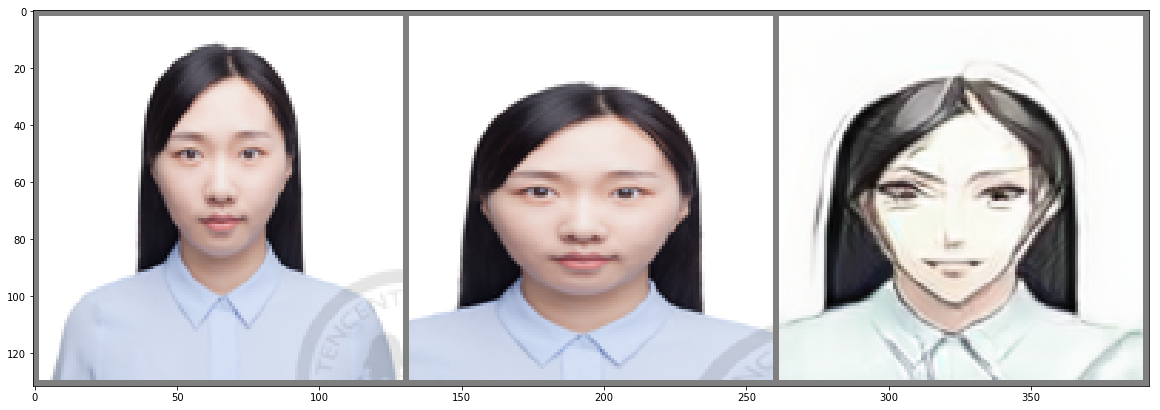

In [20]:
import utils.align as align

reload(align)

def test_lambda_2(net, lambda1 = 77.0, lambda2 = 228.0, lambda3 = 111.0):
    img_path = './datasets/test_drop/trainB/kaceyqin.png'
    print(img_path)
    attr = align.face_detect(img_path)
    print(attr)
    im = Image.open(img_path).convert('RGB')
    B_ = align.align_eye_pad_ailab(im, attr, lambda1, lambda2, lambda3)
    fake_A_1 = visualize_test.test_img(B_, net['B'], img_pre_128, 128, eval_mode=True)
    visualize_test.show(torchvision.utils.make_grid([img_pre_128(im), img_pre_128(B_), fake_A_1.data[0].cpu()]))

test_lambda_2(net_1_male)

./datasets/test_drop/trainB/kaceyqin.png
{'fm4y': 281.432, 'fm4x': 290.873, 'y1': 171.187, 'num': 1, 'x2': 334.249, 'y2': 340.746, 'x1': 92.0428, 'fm2y': 249.727, 'fm2x': 253.714, 'fm3x': 220.507, 'fm3y': 283.534, 'fm1x': 291.353, 'fm1y': 189.798, 'fm0y': 191.706, 'fm0x': 210.34}
200


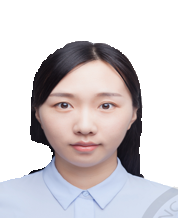

In [21]:
img_path = './datasets/test_drop/trainB/kaceyqin.png'
print img_path
attr = align.face_detect(img_path)
print attr
im = Image.open(img_path).convert('RGB')
lambda1 = 77.0
lambda2 = 228.0
lambda3 = 111.0
align.predict_mask(align.align_eye_pad_ailab(im,attr, lambda1, lambda2, lambda3))

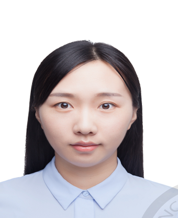

In [22]:
impath = './datasets/test_drop/trainB/kaceyqin.png'


align.align(Image.open(impath), align.face_detect(impath))

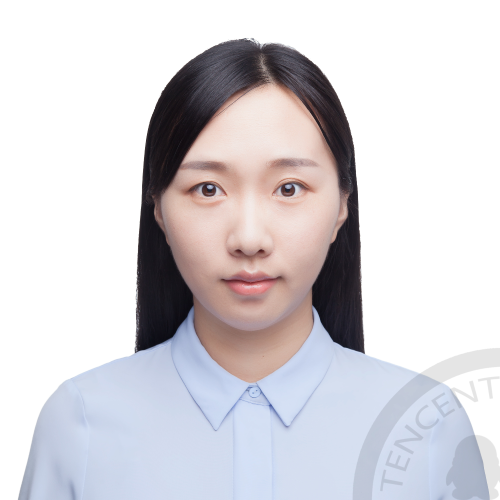

In [23]:
Image.open( './datasets/test_drop/trainB/kaceyqin.png')

In [24]:
reload(align)

<module 'utils.align' from 'utils/align.pyc'>

In [25]:
reload(align)

<module 'utils.align' from 'utils/align.pyc'>

In [ ]:
B_path = glob.glob('./datasets/getchu_aisacelebaselfie_aligned_cleaned_masked_blur/trainB/*')

In [26]:
female_model_list_rev = {idx:i for idx,i in enumerate(female_model_list)}
male_model_list_rev = {idx:i for idx,i in enumerate(male_model_list)}

In [27]:
ok_idx = []
for idx, i in enumerate(pass_idx):
    if idx in skip_list:
        failed_idx.append(i)
    else:
        ok_idx.append(i)

NameError: name 'pass_idx' is not defined

In [33]:
ok_idx=[1]

In [34]:
failed_idx=[2]

In [35]:
img_list =  []
for idx, i in enumerate(tqdm.tqdm_notebook(failed_idx)):
    try:
        exec("fake_A_%d = visualize_test.test_img(img_masked, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))
        img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))
        print(female_model_list_rev[i], 'reuslt_error')
    except:
        print(female_model_list_rev[i], 'net_not_found')

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned)] + [img_pre_128(img_blank)] * 8
                                                      + img_list, nrow=10),show=True)

('/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_AisCelSelf_gp2p5_d4_ls128_0', 'net_not_found')


NameError: name 'img' is not defined

In [37]:
gpu_ids = [0]
Tensor = torch.cuda.FloatTensor
opt = util.load_opt('./checkpoints/female_AisCelSelf_d4_gp10_ls256_0/', opt)
opt.not_caffe = True
netG_A = networks.define_G(opt.input_nc, opt.output_nc,
                              64, opt.which_model_netG,
                              opt.norm,  not True, opt.init_type,
                              gpu_ids, opt=opt)
util.load_network_with_path(netG_A, 'G_A', path)

netG_B = networks.define_G(opt.input_nc, opt.output_nc,
                              64, opt.which_model_netG,
                              opt.norm,  not True, opt.init_type,
                              gpu_ids, opt=opt)
util.load_network_with_path(netG_B, 'G_B', path)
netG_A.cuda()
netG_B.cuda()

initialization method [xavier]
Unable to load layer in : G_A model.0.weight
Unable to load layer in : G_A model.1.weight
Unable to load layer in : G_A model.1.bias
Unable to load layer in : G_A model.1.running_mean
Unable to load layer in : G_A model.1.running_var
Unable to load layer in : G_A model.1.num_batches_tracked
Unable to load layer in : G_A model.3.weight
Unable to load layer in : G_A model.4.weight
Unable to load layer in : G_A model.4.bias
Unable to load layer in : G_A model.4.running_mean
Unable to load layer in : G_A model.4.running_var
Unable to load layer in : G_A model.4.num_batches_tracked
Unable to load layer in : G_A model.6.weight
Unable to load layer in : G_A model.7.weight
Unable to load layer in : G_A model.7.bias
Unable to load layer in : G_A model.7.running_mean
Unable to load layer in : G_A model.7.running_var
Unable to load layer in : G_A model.7.num_batches_tracked
Unable to load layer in : G_A model.9.conv_block.0.weight
Unable to load layer in : G_A model

ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1), bias=False)
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (8): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), bias=False)
        (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (3): ReLU(inplace)
        (4): ReflectionPad2d((1, 1, 1, 1

In [41]:
img_path = './datasets/test_drop/trainB/kaceyqin.png'
img_aligned = align.align(img, attr)
print attr

{'fm4y': 281.432, 'fm4x': 290.873, 'y1': 171.187, 'num': 1, 'x2': 334.249, 'y2': 340.746, 'x1': 92.0428, 'fm2y': 249.727, 'fm2x': 253.714, 'fm3x': 220.507, 'fm3y': 283.534, 'fm1x': 291.353, 'fm1y': 189.798, 'fm0y': 191.706, 'fm0x': 210.34}


200


KeyError: 64

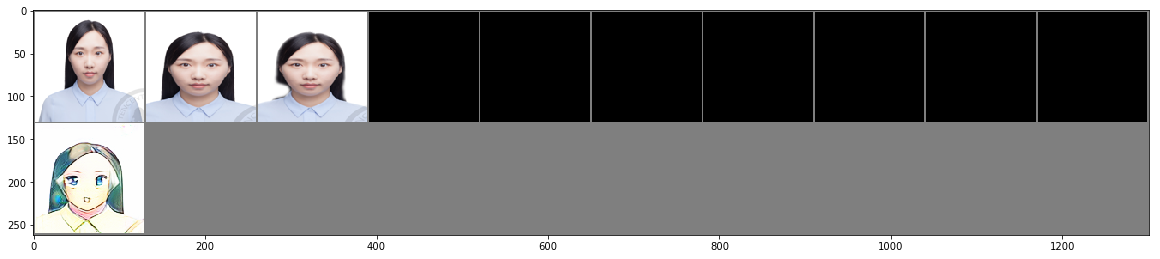

In [38]:
# B_path = glob.glob('./datasets/etc/celeba/original/img_celeba/*')
img_path = random.choice(B_path)
img_path = './datasets/test_drop/trainB/kaceyqin.png'
# img_path = '../../cyclegan/pytorch-CycleGAN-and-pix2pix/checkpoints/getchu_celeba_bs1/web/images/epoch034_real_B.png'
attr = align.face_detect(img_path)
img = Image.open(img_path).convert('RGB')
img_aligned = img
img_aligned = align.align(img, attr)
img_masked = align.predict_mask_alt(img_aligned)
img_blank = Image.fromarray(np.ones((128,128,3)).astype(np.uint8))

problems =  {64: 'unable to transfer',
             52: 'occasionally unable to transfer',
             35: 'mode collapce',
             39: 'mode collapce'}
good_models = [
    (57, '/data2/minjunli/prj/anime/img-trans-pytorch/checkpoints/Get_AisCelSelf_128_d4_aff_gp2p5_caffe_1'),
    
]

# mode 1: Not very similar to the input image, and tend to be mode collapce (in most cases output black/brown hair chara)
model_mode = {1:[3,4,5,9,12,20,21,25,26,29,41,42,46,51,63]} 

for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx)):
    exec("fake_A_%d = visualize_test.test_img(img_aligned, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

img_list = []
for idx, i in enumerate(ok_idx):
#     if idx in model_mode[1]:
#         img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))
    if idx in problems.keys() or idx in model_mode[1]:
#         pass
        img_list.append(eval("fake_A_%d.data[0].cpu() / 5"%(i)))
    else:
        img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))

# for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx)):
#     exec("fake_A_%d = visualize_test.test_img(img_aligned, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

# for idx, i in enumerate(ok_idx):
#     if idx in model_mode[1]:
#         img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned), img_pre_128(img_masked)] + [img_pre_128(img_blank)] * 7
                                                      + img_list, nrow=10),show=True)

for i in problems:
    print(female_model_list_rev[i], problems[i])
    

200


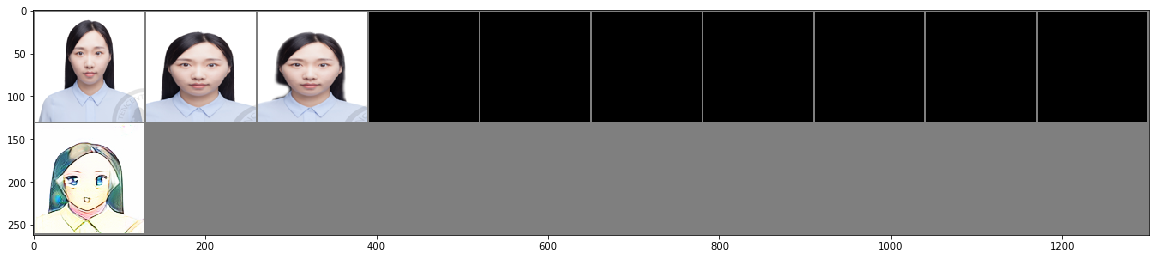

In [42]:
# B_path = glob.glob('./datasets/etc/celeba/original/img_celeba/*')
# img_path = random.choice(B_path)
img_path = './datasets/test_drop/trainB/kaceyqin.png'
# img_path = '../../cyclegan/pytorch-CycleGAN-and-pix2pix/checkpoints/getchu_celeba_bs1/web/images/epoch034_real_B.png'
attr = align.face_detect(img_path)
img = Image.open(img_path).convert('RGB')
img_aligned = img
img_aligned = align.align(img, attr)
img_masked = align.predict_mask_alt(img_aligned)
img_blank = Image.fromarray(np.ones((128,128,3)).astype(np.uint8))

problems =  {}

for idx, i in enumerate(tqdm.tqdm_notebook(range(len(female_model_list)))):
    exec("fake_A_%d = visualize_test.test_img(img_aligned, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

img_list = []
for idx, i in enumerate(ok_idx):
#     if idx in model_mode[1]:
#         img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))
    if idx in problems.keys() or idx in model_mode[1]:
#         pass
        img_list.append(eval("fake_A_%d.data[0].cpu() / 5"%(i)))
    else:
        img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))

# for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx)):
#     exec("fake_A_%d = visualize_test.test_img(img_aligned, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

# for idx, i in enumerate(ok_idx):
#     if idx in model_mode[1]:
#         img_list.append(eval("fake_A_%d.data[0].cpu()"%(i)))

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned), img_pre_128(img_masked)] + [img_pre_128(img_blank)] * 7
                                                      + img_list, nrow=10),show=True)

for i in problems:
    print(female_model_list_rev[i], problems[i])
    

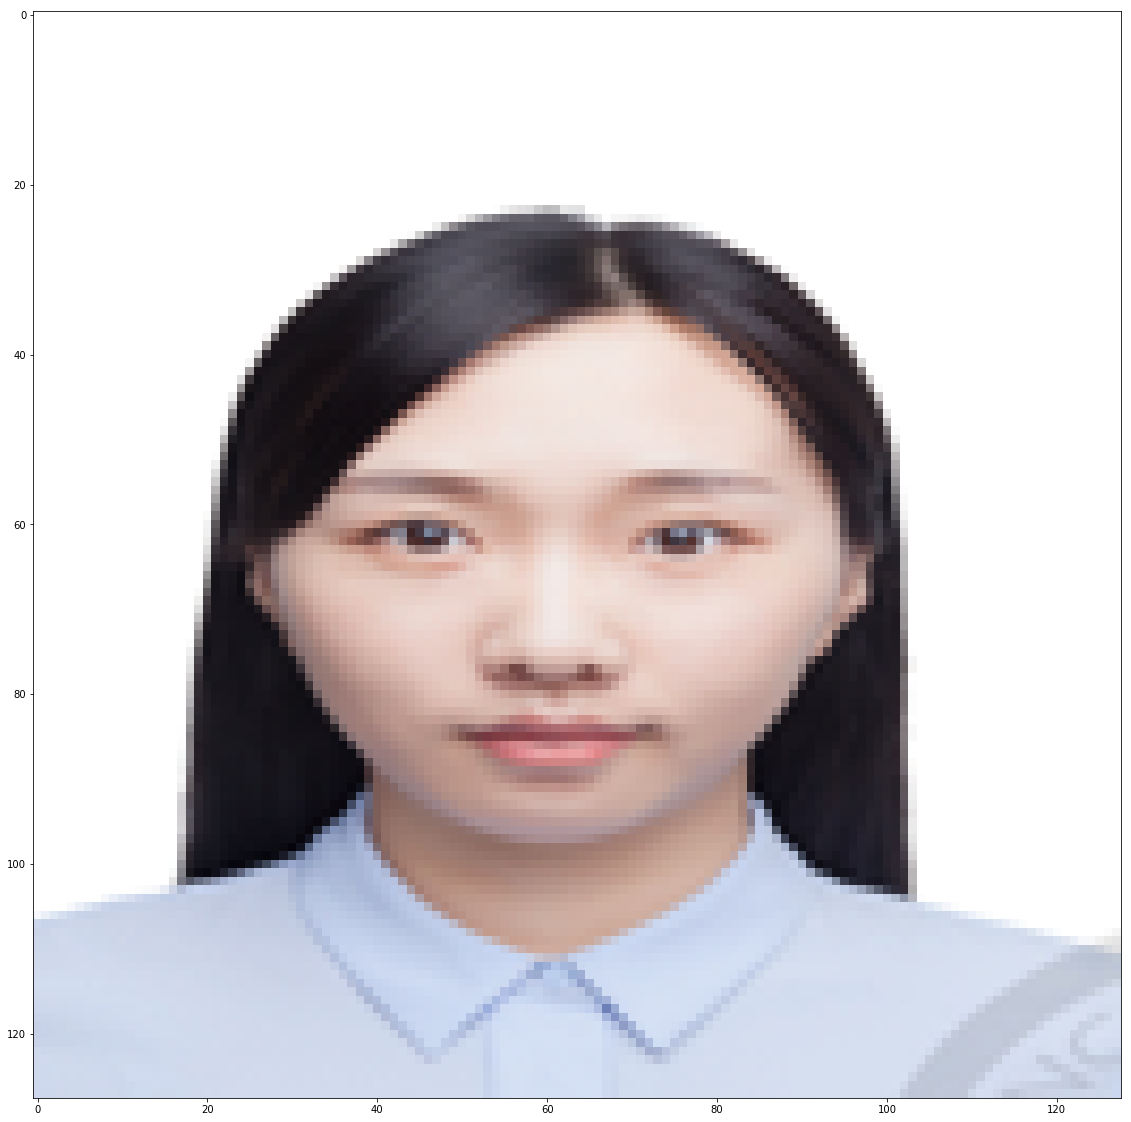

In [43]:
tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img_aligned)] + img_list[10:20], nrow=3),show=True)

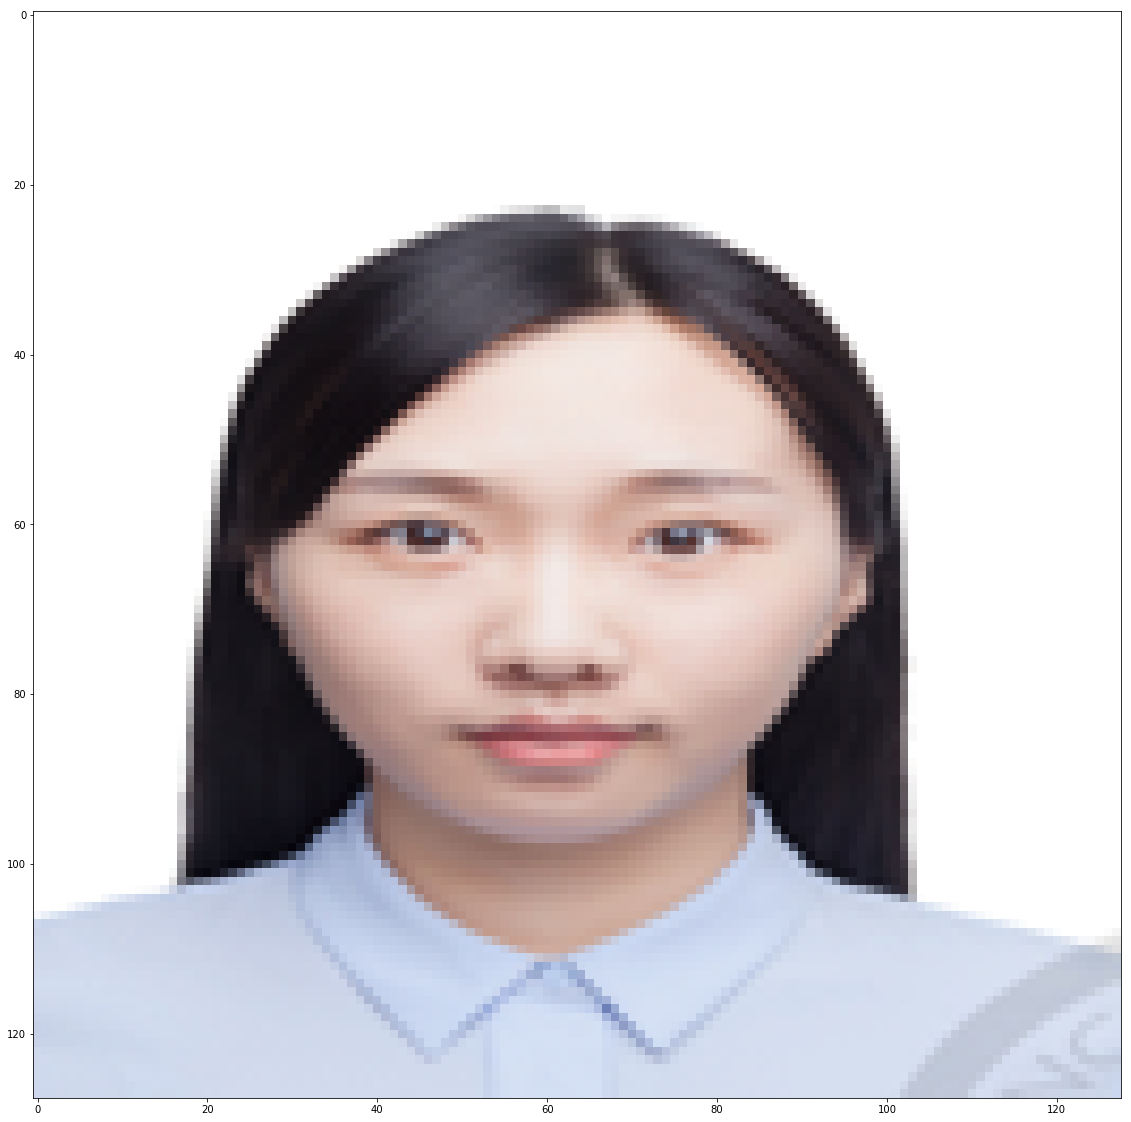

In [44]:
tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img_aligned)] + img_list[20:30], nrow=3),show=True)

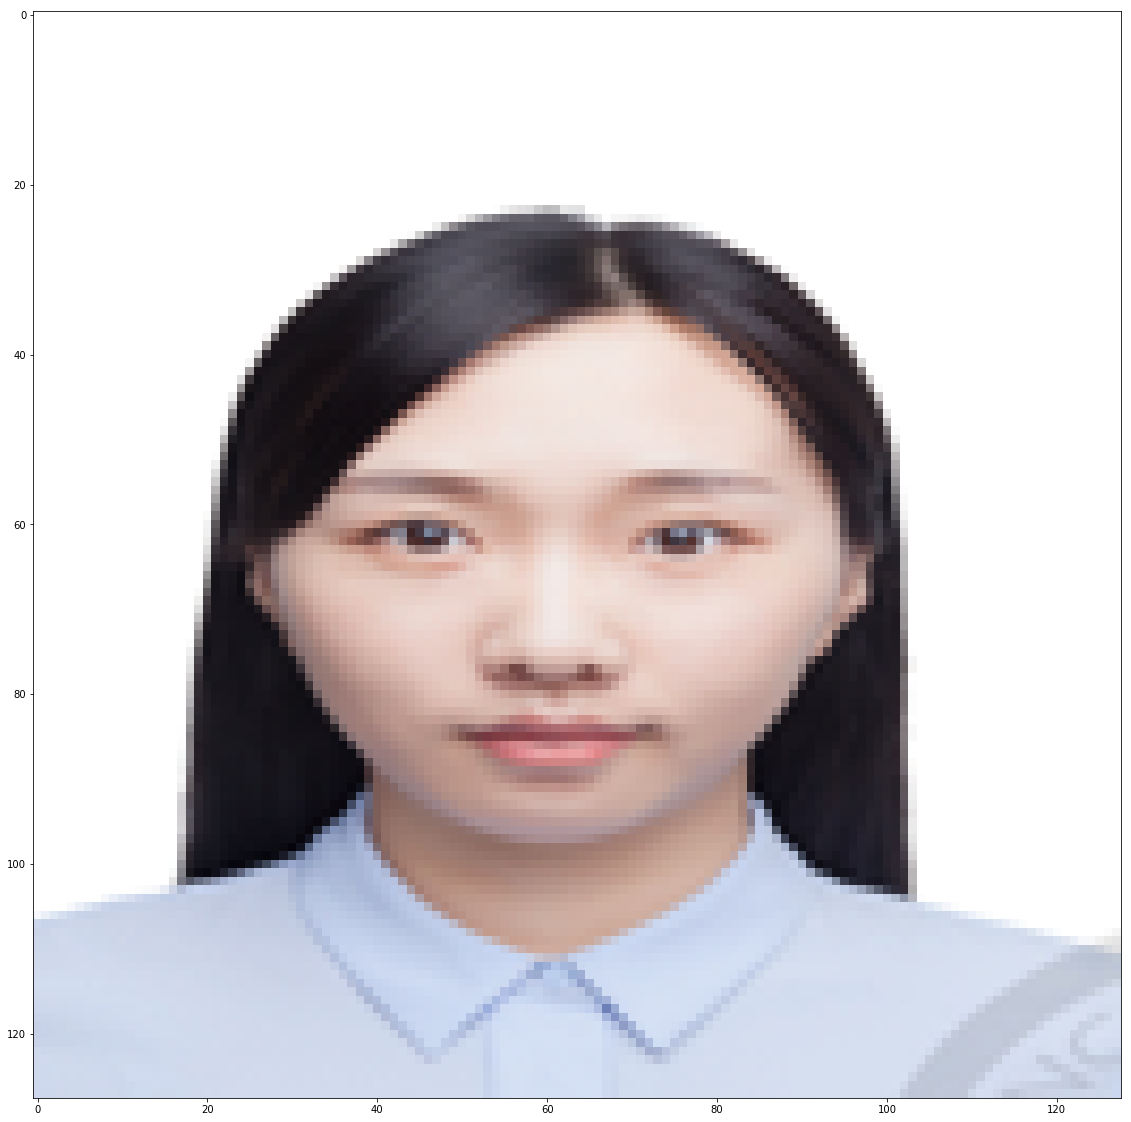

In [45]:
tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img_aligned)] + img_list[70:], nrow=3),show=True)

In [47]:
from PIL import ImageOps
from IPython.html.widgets import interact
reload(align)
cidx = ok_idx[0]
print(cidx, female_model_list_rev[cidx])
def tt(l1 = 77.0, l2 = 228.0, l3 = 111.0):
#     img_aligned = img
    img_aligned = align.align(img, attr, l1, l2, l3)
    img_masked = align.predict_mask_alt(img_aligned)
    crop_pos, img_show =  align.align(img, attr, l1, l2, l3, show=True)
    for i in [cidx]:
        exec("fake_A_%d = visualize_test.test_img(img_masked, net_%d['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))
    return visualize_test.show(torchvision.utils.make_grid([img_pre_128(img_show)] + [eval("fake_A_%d.data[0].cpu()"%cidx)] , nrow=6),show=False).resize((1024,512))

interact(tt, l1=(70,90,1), l2=(210,240,1), l3=(105,120,1))

(1, '/data2/minjunli/prj/img-trans-pytorch/checkpoints/female_new_d4_gp10_ls256_sc0.5_hp200_0')


<function __main__.tt>

In [50]:
# B_path = glob.glob('./datasets/etc/haozhi_val/*')
# img_path = random.choice(B_path)
# img_path = './tmp/FullSizeRender_(1).jpg'
reload(align)
img_path = './datasets/test_drop/trainB/kaceyqin.png'
attr = align.face_detect(img_path)
img = Image.open(img_path).convert('RGB')
img_aligned = img
img_aligned = align.align(img, attr)
img_show = align.align(img,attr, show=True)
img_masked = align.predict_mask_alt(img_aligned)
img_blank = Image.fromarray(np.ones((128,128,3)).astype(np.uint8))

problems_male = {}
good_models_male = []

for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx_male)):
    exec("fake_A_%d_male = visualize_test.test_img(img_aligned, net_%d_male['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

img_list_male = []
for idx, i in enumerate(ok_idx_male):
    tmp = eval("fake_A_%d_male.data[0].cpu()"%(i))
    if tmp.shape[-1] != 128:
        continue
    if idx in problems_male.keys():
        img_list_male.append(tmp/5)
    else:
        img_list_male.append(tmp)

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_show), img_pre_128(img_masked)] 
                                                      + [img_pre_128(img_blank)] * 0
                                                      + img_list_male[:], nrow=3),show=True)

# for i in problems:
#     print(female_model_list_rev[i], problems[i])
    

200


TypeError: img should be PIL Image. Got <type 'tuple'>

In [51]:
for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx_male)):
    exec("fake_A_%d_male = visualize_test.test_img(img_masked, net_%d_male['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))

img_list_male = []
for idx, i in enumerate(ok_idx_male):
    tmp = eval("fake_A_%d_male.data[0].cpu()"%(i))
    if tmp.shape[-1] != 128:
        continue
    if idx in problems_male.keys():
        img_list_male.append(tmp/5)
    else:
        img_list_male.append(tmp)

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_show), img_pre_128(img_masked)] 
                                                      + [img_pre_128(img_blank)] * 0
                                                      + [img_list_male[-11],img_list_male[-9],img_list_male[-6]], nrow=3),show=True)


TypeError: img should be PIL Image. Got <type 'tuple'>

In [ ]:
for i in range(len(male_model_list)):
    print i, male_model_list_rev[i]

In [15]:
B_path = glob.glob('./datasets/getchu_men_v5/trainA/*')
img_path = random.choice(B_path)
# img_path = '../face_lib_points/testimg/nan4.jpg'
# attr = face_detect(img_path)
img = Image.open(img_path).convert('RGB')
img_aligned = img
# img_aligned = align(img, attr)

fake_A_1 = test_img(img_aligned, net_1['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_2 = test_img(img_aligned, net_2['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_3 = test_img(img_aligned, net_3['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_4 = test_img(img_aligned, net_4['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_5 = test_img(img_aligned, net_5['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_6 = test_img(img_aligned, net_6['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_7 = test_img(img_aligned, net_7['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_8 = test_img(img_aligned, net_8['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_9 = test_img(img_aligned, net_9['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_10 = test_img(img_aligned, net_10['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_11 = test_img(img_aligned, net_11['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_12 = test_img(img_aligned, net_12['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_13 = test_img(img_aligned, net_13['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_14 = test_img(img_aligned, net_14['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_15 = test_img(img_aligned, net_15['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)
fake_A_16 = test_img(img_aligned, net_16['A'], img_pre_128, 128, bn_eval=False, drop_eval=True)

tmp = show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned), 
                                        fake_A_1.data[0].cpu(), fake_A_2.data[0].cpu(), 
                                        fake_A_3.data[0].cpu(), fake_A_4.data[0].cpu(),
                                        fake_A_5.data[0].cpu(), fake_A_6.data[0].cpu(),
                                        fake_A_7.data[0].cpu(), fake_A_8.data[0].cpu(),
                                        fake_A_9.data[0].cpu(), fake_A_10.data[0].cpu(),
                                        fake_A_11.data[0].cpu(), fake_A_12.data[0].cpu(),
                                        fake_A_13.data[0].cpu(), fake_A_14.data[0].cpu(),
                                        fake_A_15.data[0].cpu(), fake_A_16.data[0].cpu()], nrow=6),show=True)

# img_aligned = predict_mask_alt(img_aligned)
# # img_path = './datasets/getchu_aisacelebaselfie_aligned_cleaned_masked_blur_v6/trainB/'+img_path.split('/')[-1]
# # # attr = face_detect(img_path)
# # img = Image.open(img_path).convert('RGB')
# # img_aligned = img
# #img_aligned = align(img, attr)

# fake_A_1 = test_img(img_aligned, net_5['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)
# fake_A_2 = test_img(img_aligned, net_6['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)
# fake_A_3 = test_img(img_aligned, net_7['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)
# fake_A_4 = test_img(img_aligned, net_8['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)


# tmp = show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned), fake_A_1.data[0].cpu(), fake_A_2.data[0].cpu(), fake_A_3.data[0].cpu(), fake_A_4.data[0].cpu()]),show=True)


IndexError: list index out of range

In [ ]:
bad_example.append(img_path)
print bad_example

In [ ]:
import torch.nn as nn

In [ ]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1) 

class NLayerDiscriminatorMod(nn.Module):
    def __init__(self, input_nc, ndf=64, n_layers=3, max_mult=8, norm_layer=nn.BatchNorm2d, feat_len=256):
        super(NLayerDiscriminatorMod, self).__init__()
        use_bias = False
        kw = 3

        padw = 1
        sequence = [
            nn.Conv2d(input_nc, ndf, kernel_size=7, stride=2, padding=3),
            norm_layer(ndf),
            nn.LeakyReLU(0.2, True)
        ]

        nf_mult = 1
        nf_mult_prev = 1
        for n in range(1, n_layers):
            nf_mult_prev = nf_mult
            nf_mult = min(2**n, max_mult)
            sequence += [
                nn.Conv2d(ndf * nf_mult_prev, ndf * nf_mult,
                          kernel_size=kw, stride=2, padding=padw, bias=use_bias),
                norm_layer(ndf * nf_mult)]
            sequence += [nn.LeakyReLU(0.2, True)]

        nf_mult_prev = nf_mult
        nf_mult = min(2**n_layers, max_mult)
        sequence += [
            nn.Conv2d(ndf * nf_mult_prev, ndf * nf_mult,
                      kernel_size=kw, stride=1, padding=padw, bias=use_bias),
            norm_layer(ndf * nf_mult),
            nn.LeakyReLU(0.2, True)
        ]
        sequence += [nn.Conv2d(ndf * nf_mult, 1, kernel_size=3, stride=1, padding=padw)]
        # sequence += [nn.AvgPool2d(7, stride=1)]
        # sequence += [nn.Linear(feat_len, 1)]
        sequence += [Flatten(), nn.Linear(feat_len, 1)]

        sequence += [nn.Sigmoid()]

        self.model = nn.Sequential(*sequence)

    def forward(self, input):
        return self.model(input)

model = NLayerDiscriminatorMod(3, ndf=16, n_layers = 6, max_mult=8, feat_len=4)
model = model.cuda()
checkpoint = torch.load('../checkpoints/fake_detect_models/dis_mod_v2_all_balanced/chkpt_2600.pth.tar')
model.load_state_dict(checkpoint['state_dict'])
model.eval()

In [ ]:
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                      std=[0.5, 0.5, 0.5])
trans = transforms.Compose([
    transforms.Scale(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    normalize
])


In [ ]:
B_path = glob.glob('./datasets/etc/manga_portrait_selfie/dst_men/*')
img_path = random.choice(B_path)
# img_path = './tmp/FullSizeRender_(1).jpg'
# img_path = '/data2/minjunli/tmp/clear.jpg'
attr = align.face_detect(img_path)
img = Image.open(img_path).convert('RGB')
img_aligned = img
img_aligned = align.align(img, attr)
img_masked = align.predict_mask_alt(img_aligned)
img_blank = Image.fromarray(np.ones((128,128,3)).astype(np.uint8))

problems_male = {}
model_score = []

for idx, i in enumerate(tqdm.tqdm_notebook(ok_idx_male[-12:])):
    exec("fake_A_%d_male = visualize_test.test_img(img_masked, net_%d_male['B'], img_pre_128, 128, bn_eval=False, drop_eval=True)"%(i,i))
    exec("tmp_img = trans(Image.fromarray(util.tensor2im(fake_A_%d_male)))"%i)
    input_var = torch.autograd.Variable(tmp_img).cuda()
    input_var = input_var.view(1,3,128,128)
    with torch.no_grad():
        model_score.append(model(input_var))

img_list_male = []
for idx, i in enumerate(ok_idx_male[-12:]):
    tmp = eval("fake_A_%d_male.data[0].cpu()"%(i))
    if tmp.shape[-1] != 128:
        continue
    if idx in problems_male.keys() or model_score[idx] < 0.04:
        img_list_male.append(tmp/5)
    else:
        img_list_male.append(tmp)

tmp = visualize_test.show(torchvision.utils.make_grid([img_pre_128(img), img_pre_128(img_aligned), img_pre_128(img_masked)] 
                                                      + [img_pre_128(img_blank)] * 1
                                                      + img_list_male[-12:], nrow=4),show=True)
for i in range(len(model_score)):
    print model_score[i].data[0].cpu(),
    if (i+1) % 4 == 0:
        print ''
# for i in problems:
#     print(female_model_list_rev[i], problems[i])
    

In [ ]:
Image.fromarray(util.tensor2im(fake_A_39_male))